# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [2]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

Aufgabe 1 mit Matrix gelöst bewerten:

In [ ]:

#Defniert Länge und Breite der Matrix bzw. ist die Anzahl der Knotenpunkte:
n=1000

#erstellt die Definitionswerte der Fkt:
x=linspace(0,2*pi,n)
#erstellt die Funktionswerte der Fkt:
y=sin(x)

#erstellt D nach der Anleitung
D=np.eye(n,k=+1)-np.eye(n,k=-1)
D[0,-1]=-1
D[-1,0]=1
D[-1,:]=0 ####### warum hier die letzte Spalten null?
y[-1]=0 ####### gleich wie oben

#Berechnet die Funktionswerte der 1.Ableitung durch Matrix-Vektormultiplikation und schreibt diese in einen Vektor
df=D.dot(y)/(2*2*pi/n)
#Berechnet die Funktionswerte der 2.Ableitung durch Matrix-Vektormultiplikation und schreibt diese in einen Vektor
d2f=D.dot(df)/(2*2*pi/n)

#Dient zum Plotten der Funktionen:
#die ersten 5 und die letzten 5 Knotenpunkte der Funktionen werden nicht beachtet, da diese sehr Ungenau sind

########## wenn man die Matrize D benutzen dann ist so genau wie die andere Punkte :)
plot(x[5:n-5],y[5:n-5],'b',label='$sin(x)$')
plot(x[5:n-5],df[5:n-5],'g',label="$sin'(x)$")
plot(x[5:n-5],d2f[5:n-5],'r',label='''$sin''(x)$''')
legend()
show()

-7

### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

In [20]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #erstellt die Definitionswerte der Fkt:
    t=linspace(0,2*pi,N, endpoint = True)
    #print(t[-1])
    # t=linspace(0,2*pi,N, endpoint = False) ############ braucht man 'endpoint = False' hier sonst wird am t = 0 oder 2 pi 
                                                        # Werte undeutig
    #print(t[-1])
    #definiert h/also den Abstand zwischen den einzelnen x-Werten
    h = 2 * pi / N
    
    #erstellt D nach der Anleitung
    D=np.eye(N,k=1)-np.eye(N,k=-1)
    D[0,-1]=-1
    D[-1,0]=1
    #D[-1,:]=0
    
    
    #Formel Angewendet(um x zu berechnen):
    x=np.linalg.solve(D.dot(D) * ( 1 / ( 4 * h ** 2)) + D * ( 2 * gamma * 1 / ( 2 * h ) )+ omega0 ** 2 * np.eye(N),A * cos(t) )
    return(x)
    

      

limit_cycle()

array([ 0.20369996,  0.51866574,  0.83156767,  1.14119738,  1.44632219,
        1.74576348,  2.03832813,  2.32288577,  2.59830162,  2.8635113 ,
        3.11745625,  3.35915483,  3.58764142,  3.80203257,  4.00147085,
        4.18518494,  4.3524392 ,  4.50258661,  4.63502502,  4.74924193,
        4.84477831,  4.92126427,  4.97839131,  5.01593802,  5.03375144,
        5.03176219,  5.00997543,  4.96847496,  4.90742417,  4.82705877,
        4.72769798,  4.60972575,  4.4736123 ,  4.31988381,  4.14915427,
        3.96208384,  3.75942076,  3.54194881,  3.31053885,  3.06608596,
        2.80957001,  2.54198328,  2.26439937,  1.97789211,  1.683612  ,
        1.3826975 ,  1.07635793,  0.76577845,  0.4522082 ,  0.13686031,
       -0.17899594, -0.49413858, -0.80729817, -1.11726325, -1.42278425,
       -1.72267932, -2.01573855, -2.30082839, -2.57679772, -2.84257921,
       -3.09709878, -3.33937221, -3.5684195 , -3.78335511, -3.98330874,
       -4.16750751, -4.33520469, -4.48575232, -4.61853915, -4.73

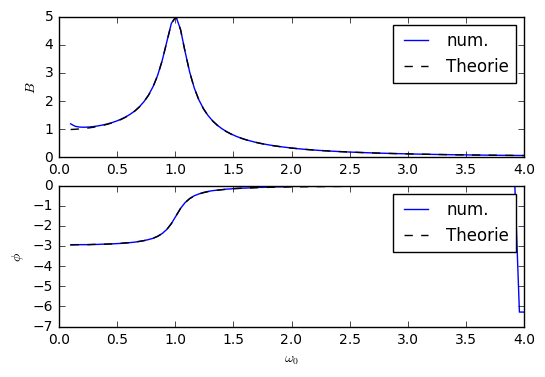

In [21]:
L=100
omega0 = np.linspace(0.1,4,L)
B = np.zeros(L)
phi = np.zeros(L)

# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith
#Berechnung der Amplitude B und phi
for i in range(0,L):
    x=limit_cycle(omega0=omega0[i],N=500)
    B[i]= x[x.argmax()]
    
    t=linspace(0,2*pi,500) ##### konstante Vector wie t soll aussern diese Loop berechnet werden
     
    phi[i] = -t[x.argmax()] #### wenn x max ist, wert von x_max ist B, und t wert ist dann den phi
    #phi[i]= (-1) * ( arccos( x[i] / B[0] ) - t[i] )

A=1
gamma=0.1
Bth=np.zeros(L)
phith=np.zeros(L)

#Berechnung der theoretischen Amplitude Bth und des theoretischem phi:
for n in range(0,L):
    Bth[n]=A/sqrt((omega0[n]**2-1)**2+4*gamma**2)
    phith[n]= np.arctan2((-2*gamma),(omega0[n]**2-1))

subplot(2,1,1)
plot(omega0,B,label='num.')
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()
-8